In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='count'>

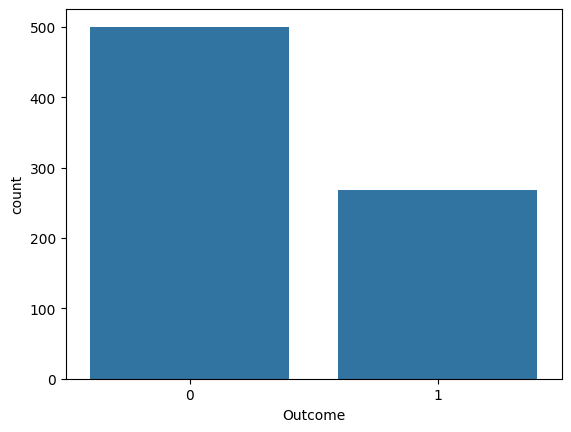

In [10]:
sns.countplot(x='Outcome', data=df)

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DECISION TREE

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
tree_pred = decision_tree.predict(x_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test,tree_pred))
print("--------------------------------")
print(classification_report(y_test,tree_pred))

[[75 24]
 [17 38]]
--------------------------------
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [28]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
random_prediction = random_forest_model.predict(x_test)

In [25]:
print(confusion_matrix(y_test,random_prediction))
print("--------------------------------")
print(classification_report(y_test,random_prediction))

[[83 16]
 [19 36]]
--------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



TEST WITH REFRESSION

In [33]:
random_forest_model2 = RandomForestRegressor()

In [34]:
random_forest_model2.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
random_prediction = random_forest_model2.predict(x_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:
mae = mean_absolute_error(y_test, random_prediction)
mse = mean_squared_error(y_test, random_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, random_prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.3133116883116883
Mean Squared Error (MSE): 0.16958506493506495
Root Mean Squared Error (RMSE): 0.4118070724684861
R-squared (R²): 0.261362828282828
